<a href="https://colab.research.google.com/github/markzaldivar/MAT422/blob/main/MaximumLikelihoodEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Estimation
Maximum likelihood estimation (MLE) is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible. As a result, the method has become a dominant means of statistical inference

## MLE for Random Samples
Let $X_{1}, X_{2}, \ldots, X_{n}$ have joint $\mathrm{pmf}$ or pdf
$$
f\left(x_{1}, x_{2}, \ldots, x_{n} ; \theta_{1}, \ldots, \theta_{m}\right)
$$
where the parameters $\theta_{1}, \ldots, \theta_{m}$ have unknown values. When $x_{1}, \ldots, x_{n}$ are the observed sample values and (2.4.1) is regarded as a function of $\theta_{1}, \ldots, \theta_{m}$, it is called the likelihood function. The maximum likelihood estimates (mle's) $\hat{\theta}_{1}, \ldots, \hat{\theta}_{m}$ are those values of the $\theta_{i}$ 's that maximize the likelihood function, so that
$$
f\left(x_{1}, \ldots, x_{n} ; \hat{\theta}_{1}, \ldots, \hat{\theta}_{m}\right) \geq f\left(x_{1}, \ldots, x_{n} ; \theta_{1}, \ldots, \theta_{m}\right) \text { for all } \theta_{1}, \ldots, \theta_{m}
$$
When the $X_{i}$ 's are substituted in place of the $x_{i}$ 's, the maximum likelihood estimators result.

Let $ X_1, \dots, X_n $ be a random sample from a normal distribution. The likelihood function is:

$$
f(x_1, \dots, x_n; \mu, \sigma) = \frac{1}{(2\pi \sigma^2)^{n/2}} \exp\left( -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2 \right)
$$

Taking the natural logarithm of the likelihood function gives:

$$
\ln f(x_1, \dots, x_n; \mu, \sigma) = -\frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

The maximum likelihood estimates for the mean $\mu $ and variance $ \sigma^2$ of a normal distribution based on a random sample are:

$$
\hat{\mu} = \bar{X}, \quad \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2
$$


We apply these concepts in Python below. We begin by generating samples from a normal distribution with known parameters. We then use built-in Python functions to minimize the negative log likelihood function (This is the same as maximizing the function). The results are shown in a histogram.

True mean: 5, MLE mean: 4.79230605015222
True standard deviation: 2, MLE standard deviation: 1.8072322517765047


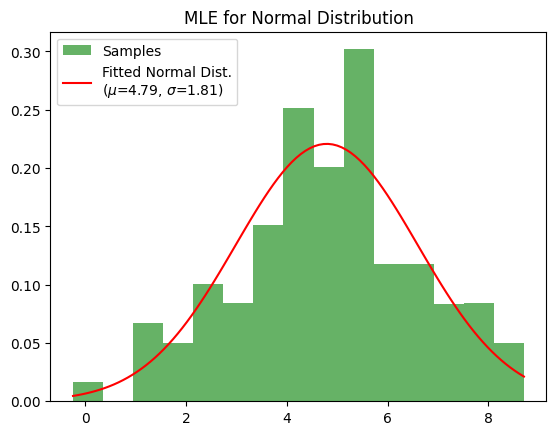

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Step 1: Generate random samples from a known normal distribution
np.random.seed(42)  # For reproducibility
true_mu = 5        # True mean of the distribution
true_sigma = 2     # True standard deviation of the distribution
n_samples = 100    # Number of samples

samples = np.random.normal(loc=true_mu, scale=true_sigma, size=n_samples)

# Step 2: Define the log-likelihood function
def log_likelihood(params, data):
    mu, sigma = params
    n = len(data)
    # Log-likelihood for normal distribution
    log_likelihood_value = -n/2 * np.log(2 * np.pi * sigma**2) - np.sum((data - mu)**2) / (2 * sigma**2)
    return -log_likelihood_value  # Return negative because we will minimize it (instead of maximizing)

# Step 3: Use optimization to find the MLE for mu and sigma
initial_guess = [0, 1]  # Initial guess for mu and sigma
result = minimize(log_likelihood, initial_guess, args=(samples,), bounds=[(-np.inf, np.inf), (1e-6, np.inf)])

# Step 4: Output the estimated parameters
mle_mu, mle_sigma = result.x
print(f"True mean: {true_mu}, MLE mean: {mle_mu}")
print(f"True standard deviation: {true_sigma}, MLE standard deviation: {mle_sigma}")

# Plot the histogram of the samples and the fitted normal distribution
x = np.linspace(min(samples), max(samples), 100)
fitted_pdf = (1 / (mle_sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mle_mu)**2 / (2 * mle_sigma**2))

plt.hist(samples, bins=15, density=True, alpha=0.6, color='g', label="Samples")
plt.plot(x, fitted_pdf, label=f"Fitted Normal Dist.\n($\mu$={mle_mu:.2f}, $\sigma$={mle_sigma:.2f})", color='red')
plt.title("MLE for Normal Distribution")
plt.legend()
plt.show()


## Linear Regression
Given input data points $\left\{\left(\mathbf{x}_{i}, y_{i}\right)\right\}_{i=1}^{n}$, we seek an affine function to fit the data and each $\mathbf{x}_{i}=\left(x_{i 1}, \ldots, x_{i p}\right)$. The common approach involves finding coefficients $\beta_{j}, j=1 \ldots, p$ 's that minimize the criterion
$$
\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
where
$$
\hat{y}_{i}=\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}
$$
Now we wish to discuss it from a probabilistic point of view by the maximum likelihood estimation. Consider that we have $n$ points, each of which is drawn in an independent and identically distributed (i.i.d.) way from the normal distribution. For a given, $\mu, \sigma^{2}$, the probability of those $n$ points being drawn define the likelihood function, which are just the multiplication of $n$ normal probability density functions (pdf) (because they are independent).
$$
\mathscr{P}(\mu \mid y)=\prod_{i=1}^{n} P_{Y}\left(y_{i} \mid \mu, \sigma^{2}\right)=\prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\mu\right)^{2}}{2 \sigma^{2}}}
$$
Now understand that $y$ is a random variable.
$$
y_{i}=\hat{y}_{i}+\varepsilon
$$
where $\varepsilon \sim N\left(0, \sigma^{2}\right)$. Thus, $y_{i}$ is a normal variable with mean as a linear function of $\mathbf{x}$ and a fixed standard deviation:
$$
y_{i} \sim N\left(\hat{y}_{i}, \sigma^{2}\right)
$$
As a result, for each $y_{i}$, we choose $\mu$ in the normal distributions in as
$$
\mu_{i}=\hat{y}_{i}
$$
Hence we derive the maximum likelihood estimate
$$
\begin{aligned}
\hat{\beta}=\arg \max \mathscr{P}(\beta \mid y) &=\arg \max _{\beta} \prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}} \\
&=\arg \max _{\beta} \log \left(\prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{\left.-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}\right)}\right.\\
&=\arg \max _{\beta} \sum_{i=1}^{n} \log \left(\frac{1}{\sigma \sqrt{2 \pi}}\right)+\log \left(e^{\left.-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}\right)}\right.\\
&=\arg \max _{\beta} \sum_{i=1}^{n} \log \left(e^{\left.-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}\right)}\right.\\
&=\arg \max _{\beta} \sum_{i=1}^{n}-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}} \\
&=\arg \min _{\beta} \sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
\end{aligned}
$$
which is exactly the least square problem we discussed before.

We explore these concepts in Python below. The process is similar to the previous example. We begin by generating data according to a true model with known parameters. We then proceed with optimizing the log likelihood function. The results are displayed below.

True intercept: 3, MLE intercept: 3.2150952578682435
True slope: 4, MLE slope: 3.7701140650770824
True sigma: 1, MLE sigma: 0.8981004392162059


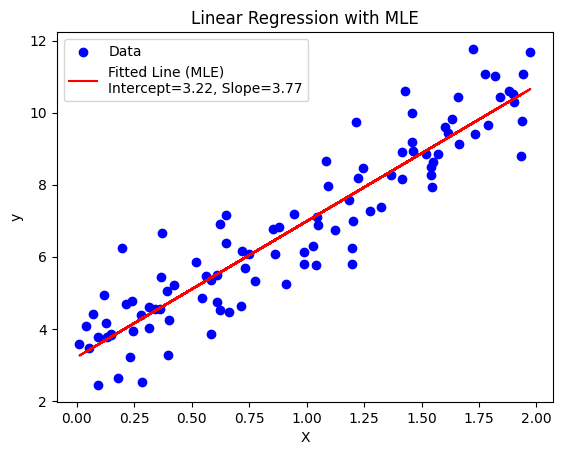

In [2]:


# Step 1: Generate synthetic data
np.random.seed(42)
n_samples = 100
X = 2 * np.random.rand(n_samples)
true_beta_0 = 3  # True intercept
true_beta_1 = 4  # True slope
true_sigma = 1   # Standard deviation of noise

# Generate the target variable y with some added noise
noise = np.random.normal(0, true_sigma, n_samples)
y = true_beta_0 + true_beta_1 * X + noise

# Step 2: Define the log-likelihood function for linear regression
def log_likelihood(params, X, y):
    beta_0, beta_1, sigma = params
    y_pred = beta_0 + beta_1 * X
    n = len(y)
    # Log-likelihood for normal distribution of residuals
    residuals = y - y_pred
    log_likelihood_value = -n/2 * np.log(2 * np.pi * sigma**2) - np.sum(residuals**2) / (2 * sigma**2)
    return -log_likelihood_value  # Negative because we are minimizing

# Step 3: Use optimization to find the MLE for beta_0, beta_1, and sigma
initial_guess = [0, 0, 1]  # Initial guess for [beta_0, beta_1, sigma]
result = minimize(log_likelihood, initial_guess, args=(X, y), bounds=[(-np.inf, np.inf), (-np.inf, np.inf), (1e-6, np.inf)])

# Extract MLE estimates
mle_beta_0, mle_beta_1, mle_sigma = result.x
print(f"True intercept: {true_beta_0}, MLE intercept: {mle_beta_0}")
print(f"True slope: {true_beta_1}, MLE slope: {mle_beta_1}")
print(f"True sigma: {true_sigma}, MLE sigma: {mle_sigma}")

# Step 4: Plot the data and the fitted regression line
plt.scatter(X, y, label="Data", color="blue")
y_pred_mle = mle_beta_0 + mle_beta_1 * X
plt.plot(X, y_pred_mle, color="red", label=f"Fitted Line (MLE)\nIntercept={mle_beta_0:.2f}, Slope={mle_beta_1:.2f}")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression with MLE")
plt.show()
